In [5]:
import nltk
nltk.download('punkt')
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
# Sample corpus
corpus = [
    "Natural language processing is a fascinating field",
    "Word embeddings capture semantic meanings",
    "NLP is used in chatbots and virtual assistants",
    "Word2Vec is a powerful tool for creating word embeddings"
]


In [8]:
# Tokenize sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

In [9]:
# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

In [10]:
# Save the model
model.save("word2vec.model")

In [11]:
similar_words = model.wv.most_similar('nlp')
print(similar_words)


[('creating', 0.2528621256351471), ('natural', 0.14715638756752014), ('virtual', 0.14268764853477478), ('a', 0.13727159798145294), ('and', 0.11662642657756805), ('powerful', 0.07193466275930405), ('tool', 0.04568825289607048), ('for', 0.04409316927194595), ('used', 0.027098750695586205), ('language', 0.012944955378770828)]


In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [13]:
# Load the trained Word2Vec model
model = Word2Vec.load("word2vec.model")

In [14]:
# Get vectors for a subset of words
words = list(model.wv.index_to_key)[:10]
word_vectors = [model.wv[word] for word in words]

In [15]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

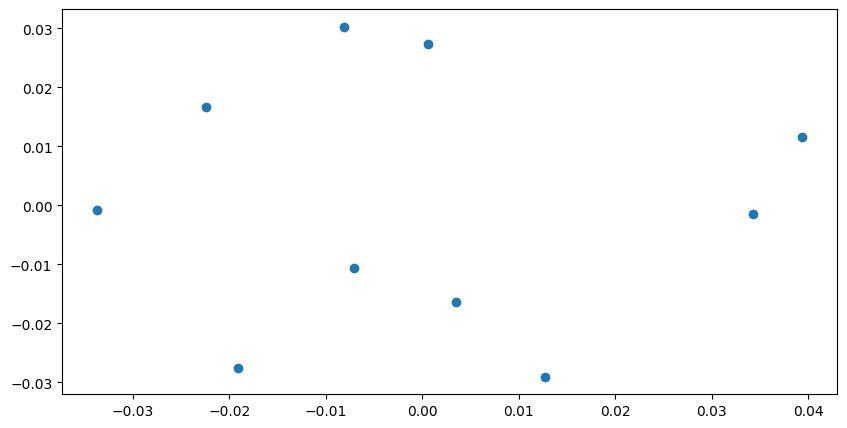

In [16]:
# Plot the words
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

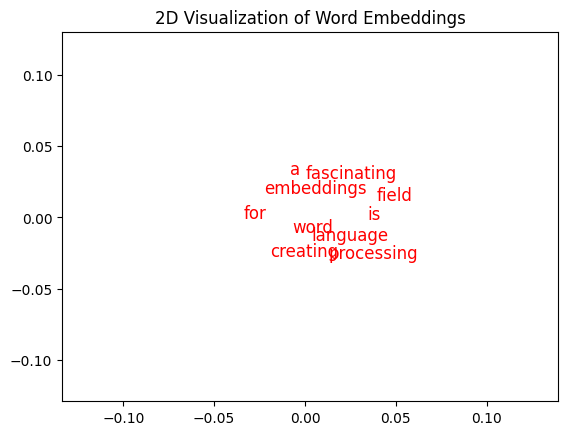

In [18]:
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=12, color='red')

# Optionally, you can set the limits to ensure all annotations are visible
plt.xlim(pca_result[:, 0].min() - 0.1, pca_result[:, 0].max() + 0.1)
plt.ylim(pca_result[:, 1].min() - 0.1, pca_result[:, 1].max() + 0.1)

plt.title("2D Visualization of Word Embeddings")
plt.show()